## 집값 예측 경진대회 (2022.01.24 ~ 2022.02.04)


In [213]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

#한글폰트 설정
import matplotlib.font_manager as fm
path = 'C:\\Users\\myksh\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.ttf'
# path = 'C:\\Users\\myksh\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquare.ttf'
font_name = fm.FontProperties(fname=path).get_name()
print(font_name)
plt.rc('font', family=font_name)

plt.rcParams['font.family'] = 'NanumGothic'

#마이너스가 깨질 것을 방지
plt.rcParams['axes.unicode_minus'] = False

NanumGothic


#### Columns
- id : 데이터 고유 id
- OverallQual : 전반적 재료와 마감 품질
- YearBuilt : 완공 연도
- YearRemod/Add : 리모델링 연도
- ExterQual : 외관 재료 품질
- BsmtQual : 지하실 높이
- TotalBsmtSF : 지하실 면적 
- 1stFlrSF : 1층 면적 
- GrLivArea : 지상층 생활 면적
- FullBath : 지상층 화장실 개수 
- KitchenQual : 부억 품질 
- GarageYrBlt : 차고 완공 연도
- GarageCars: 차고 자리 개수
- GarageArea: 차고 면적 
- target : 집값(달러 단위)

# 1. 데이터 로드

In [246]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [247]:
train.columns

Index(['id', 'Overall Qual', 'Gr Liv Area', 'Exter Qual', 'Garage Cars',
       'Garage Area', 'Kitchen Qual', 'Total Bsmt SF', '1st Flr SF',
       'Bsmt Qual', 'Full Bath', 'Year Built', 'Year Remod/Add',
       'Garage Yr Blt', 'target'],
      dtype='object')

In [248]:
train.head()

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


In [249]:
train = train.drop('id', axis=1)
test = test.drop('id', axis=1)

# 2. 결측치 확인
- 결측치는 없다.

In [250]:
# 결측치 확인
train.isnull().sum()

Overall Qual      0
Gr Liv Area       0
Exter Qual        0
Garage Cars       0
Garage Area       0
Kitchen Qual      0
Total Bsmt SF     0
1st Flr SF        0
Bsmt Qual         0
Full Bath         0
Year Built        0
Year Remod/Add    0
Garage Yr Blt     0
target            0
dtype: int64

# 3. 상관관계 확인
- target에 대해 모든 컬럼들이 0.5 이상의 상관관계를 보인다.
- 특히, 전반적 퀄리티와 집값의 상관관계가 0.8로 높다.

<AxesSubplot:>

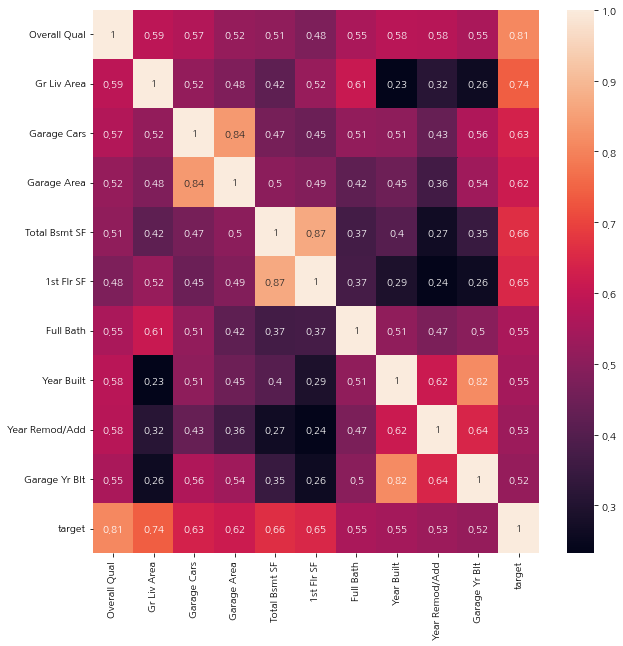

In [251]:
#상관관계 확인
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True)

# 4. EDA

## 4-1. Overall Qual
- 2 ~ 10으로 구성되어 있고 중간단계인 5 ~ 7의 데이터가 가장 많다.
- 퀄리티 단계가 높을 수록 집값은 더 높다.

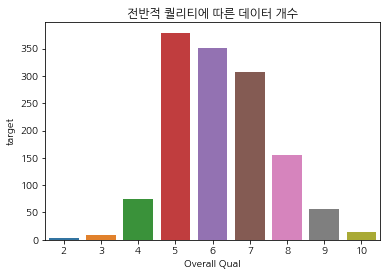

In [252]:
train.groupby('Overall Qual')['target'].mean()
sns.barplot(x=train.groupby('Overall Qual')['target'].count().index, y=train.groupby('Overall Qual')['target'].count())
_=plt.title('전반적 퀄리티에 따른 데이터 개수')

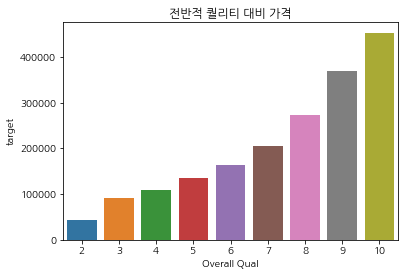

In [253]:
qual_group = train.groupby('Overall Qual')['target'].mean().to_frame()
sns.barplot(x = qual_group.index, y = qual_group['target'])
_=plt.title('전반적 퀄리티 대비 가격')

## 4-2. Year

In [254]:
#완공 연도
train['Year Built'].value_counts(sort=True)

2005    71
2006    63
2007    48
2004    48
2003    48
        ..
1908     1
1913     1
1917     1
1919     1
2010     1
Name: Year Built, Length: 105, dtype: int64

In [255]:
sorted(train['Year Built'].unique())

[1880,
 1882,
 1885,
 1890,
 1892,
 1893,
 1900,
 1908,
 1910,
 1912,
 1913,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010]

In [256]:
#연대 정리해주는 함수
def tail_year(x):
    if 0<=x<10:
        return '00'
    elif 10<=x<20:
        return '10'
    elif 20<=x<30:
        return '20'
    elif 30<=x<40:
        return '30'
    elif 40<=x<50:
        return '40'
    elif 50<=x<60:
        return '50'
    elif 60<=x<70:
        return '60'
    elif 70<=x<80:
        return '70'
    elif 80<=x<90:
        return '80'
    elif 90<=x<100:
        return '90'
def year_processing(x):
    xx = str(x)
    if xx[:2] == '18':
        return '18' + tail_year(int(xx[2:]))
    elif xx[:2] == '19':
        return '19' + tail_year(int(xx[2:]))
    elif xx[:2] == '20':
        return '20' + tail_year(int(xx[2:]))

In [257]:
#연대별로 변경
train['Year Built'] = train['Year Built'].apply(lambda x:year_processing(x))
train['Year Built'] = train['Year Built'].astype(int)

test['Year Built'] = test['Year Built'].apply(lambda x:year_processing(x))
test['Year Built'] = test['Year Built'].astype(int)

In [258]:
train['Year Built'].value_counts()

2000    380
1960    178
1970    173
1990    154
1950    154
1920     88
1940     57
1980     53
1930     49
1910     41
1900     11
1880      6
1890      5
2010      1
Name: Year Built, dtype: int64

In [259]:
#리모델링 연도
train['Year Remod/Add'].value_counts(sort=True)

1950    134
2006     93
2005     68
2007     67
2004     58
       ... 
2010      5
1986      4
1988      4
1982      4
1951      4
Name: Year Remod/Add, Length: 61, dtype: int64

In [260]:
#연대별로 정리
train['Year Remod/Add'] = train['Year Remod/Add'].apply(lambda x:year_processing(x))
train['Year Remod/Add'] = train['Year Remod/Add'].astype(int)

test['Year Remod/Add'] = test['Year Remod/Add'].apply(lambda x:year_processing(x))
test['Year Remod/Add'] = test['Year Remod/Add'].astype(int)

In [261]:
train['Year Remod/Add'].value_counts()

2000    496
1990    234
1950    226
1970    172
1960    140
1980     77
2010      5
Name: Year Remod/Add, dtype: int64

# Test Model

In [262]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Overall Qual    1350 non-null   int64 
 1   Gr Liv Area     1350 non-null   int64 
 2   Exter Qual      1350 non-null   object
 3   Garage Cars     1350 non-null   int64 
 4   Garage Area     1350 non-null   int64 
 5   Kitchen Qual    1350 non-null   object
 6   Total Bsmt SF   1350 non-null   int64 
 7   1st Flr SF      1350 non-null   int64 
 8   Bsmt Qual       1350 non-null   object
 9   Full Bath       1350 non-null   int64 
 10  Year Built      1350 non-null   int32 
 11  Year Remod/Add  1350 non-null   int32 
 12  Garage Yr Blt   1350 non-null   int64 
 13  target          1350 non-null   int64 
dtypes: int32(2), int64(9), object(3)
memory usage: 137.2+ KB


In [263]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Exter Qual','Kitchen Qual','Bsmt Qual']
for i in cols:
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])

In [264]:
X = train.drop('target', axis=1)
y = train['target']

In [265]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((1080, 13), (270, 13))

In [267]:
model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [268]:
print(model.score(X_train, y_train))

0.9837415487569247


In [269]:
pred = model.predict(X_test)
pred

array([149938.085     , 189856.501     , 173202.82450476, 202792.98096429,
       255419.664     , 221752.543     ,  98566.144     , 196545.4905    ,
       169000.824     , 259608.249     , 160477.514     , 166562.36133333,
       299698.018     , 148234.20790476, 189950.375     , 167589.596     ,
       166466.35      , 132845.88633333, 128556.54      , 163776.93316667,
       141314.227     , 198362.624     , 148748.32166667, 153810.814     ,
       156527.5945    , 203458.45      , 123653.05      , 164567.328     ,
       126375.65      , 174604.7       , 210036.162     ,  74376.597     ,
       131202.809     , 134394.232     , 223406.88      , 123773.879     ,
       188128.022     , 150414.88016667, 145038.622     , 268246.776     ,
       141146.035     , 129481.309     , 150477.48      , 368206.674     ,
       146385.21      , 181677.25      , 182824.9335    , 156764.901     ,
       140839.615     , 237304.868     , 181290.03      , 217868.064     ,
       153084.524     , 1

In [270]:
y_test

841     135000
184     199900
526     188500
1283    194700
980     375000
         ...  
1218    144000
1320    105500
1076    177625
906     108500
1343    131750
Name: target, Length: 270, dtype: int64

In [271]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(y_test, pred)**0.5
RMSE

26924.04876689671

# Submission
- base_submission : 연도만 전처리, Object는 Label Encoding 적용 후 RandomforestRegressor - 데이콘 점수 : 0.10237

In [272]:
sub = pd.read_csv('./data/sample_submission.csv')
pred = model.predict(test)

In [273]:
sub['target'] = pred

In [275]:
sub.to_csv('./data/base_submission.csv', index=False)